# Scale Free Network simulations

In [9]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import EoN
import networkx as nx
import pandas as pd


N = 10**4
G = nx.barabasi_albert_graph(N, 4)
tmax = 200
simulationRuns = 50
tau = 0.025     #transmission rate
gamma = 0.1     #recovery rate
rho = 0.005     #random fraction initially infected
step = 0.1      #step size


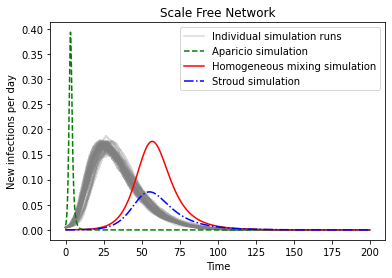

<Figure size 432x288 with 0 Axes>

In [11]:
x = np.arange(-0.1, tmax, step)
y = np.arange(-0.1, tmax, step)

for counter in range(simulationRuns):
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I/N, color = 'gray', alpha = 0.3, label = 'Individual simulation runs')
    plt.plot(t, I/N, color = 'gray', alpha = 0.3)

df1 = pd.read_csv('Sources/Aparicio_ScaleFreS.csv')
df1 = df1.loc[:, '{#status->#S}']
inc1 = - df1.diff()*11.5


df2 = pd.read_csv('Sources/Stroud_HMS.csv')
df2 = df2.loc[:, '{#status->#S}']
inc2 = - df2.diff()*60

df3 = pd.read_csv('Sources/Stroud_ScaleS.csv')
df3 = df3.loc[:, '{#status->#S}']
inc3 = - df3.diff()*40

plt.plot(x, inc1, '--', label = 'Aparicio simulation', color = 'green')
plt.plot(x, inc2, label = 'Homogeneous mixing simulation', color = 'red')
plt.plot(x, inc3, '-.', label = 'Stroud simulation', color = 'blue')


plt.xlabel('Time')
plt.ylabel('New infections per day')
plt.title('Scale Free Network')
plt.legend()
plt.show()
plt.savefig('Plot/Scale_Free_network.png')